## Handling Missing Values

* Real world data is messy and often contain a lot of missing values. There could be multiple reasons for the missing value but primarily reasons for missing can be attributed to:
    1. Data doesn't exist
    2. Data not collected due to Human error
    3. Data deleted accidently

* Either way we need to address this issue before we proceed with the modeling stuff. It is also important to note that some algorithms like XGBoost and LightGBM can treat missing data without any preprocessing.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

#### Reading dataset

In [2]:
train=pd.read_csv('C:/Users/Prerana/GItHuB/ML_Projects/Titanic/train.csv')
test=pd.read_csv('C:/Users/Prerana/GItHuB/ML_Projects/Titanic/test.csv')

print(train.shape)
print(test.shape)

(891, 12)
(418, 11)


In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

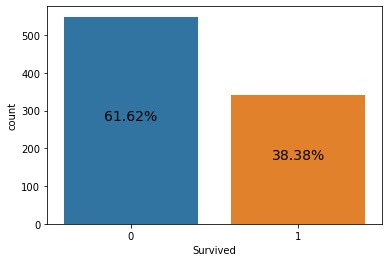

In [5]:
s = sns.countplot(x = 'Survived',data = train)
sizes=[]
for p in s.patches:
    height = p.get_height()
    sizes.append(height)
    s.text(p.get_x()+p.get_width()/2.,
            height/2,'{:1.2f}%'.format(height/len(train)*100),
            ha="center", fontsize=14)

### Detecting Missing Values

* Detecting missing values numerically:

The first step is to detect the count/percentage of missing values in every column of the dataset. This will give an idea about the distribution of missing values.

In [34]:
def missing_value_table(df):
    mis_val=df.isnull().sum()
    mis_val_percent=round(mis_val/len(df)*100,2)
    mis_val_table=pd.concat([mis_val,mis_val_percent],axis=1)
    mis_val_table.rename(columns={0:'Missing_Values',1:'Percentage of Missing Values'},inplace=True)
    mis_val_table=mis_val_table[(mis_val_table['Missing_Values']>0)]
    
    print(f'Dataset have {df.shape[1]} columns and tere are missing values in {mis_val_table.shape[0]} columns')
    
    return mis_val_table

In [35]:
missing_value_table(train)

Dataset have 12 columns and tere are missing values in 3 columns


,Missing_Values,Percentage of Missing Values
Age,177,19.87
Cabin,687,77.10
Embarked,2,0.22


In [36]:
missing_value_table(test)

Dataset have 11 columns and tere are missing values in 3 columns


,Missing_Values,Percentage of Missing Values
Age,86,20.57
Fare,1,0.24
Cabin,327,78.23


#### Visualizing Missing values location

<AxesSubplot:>

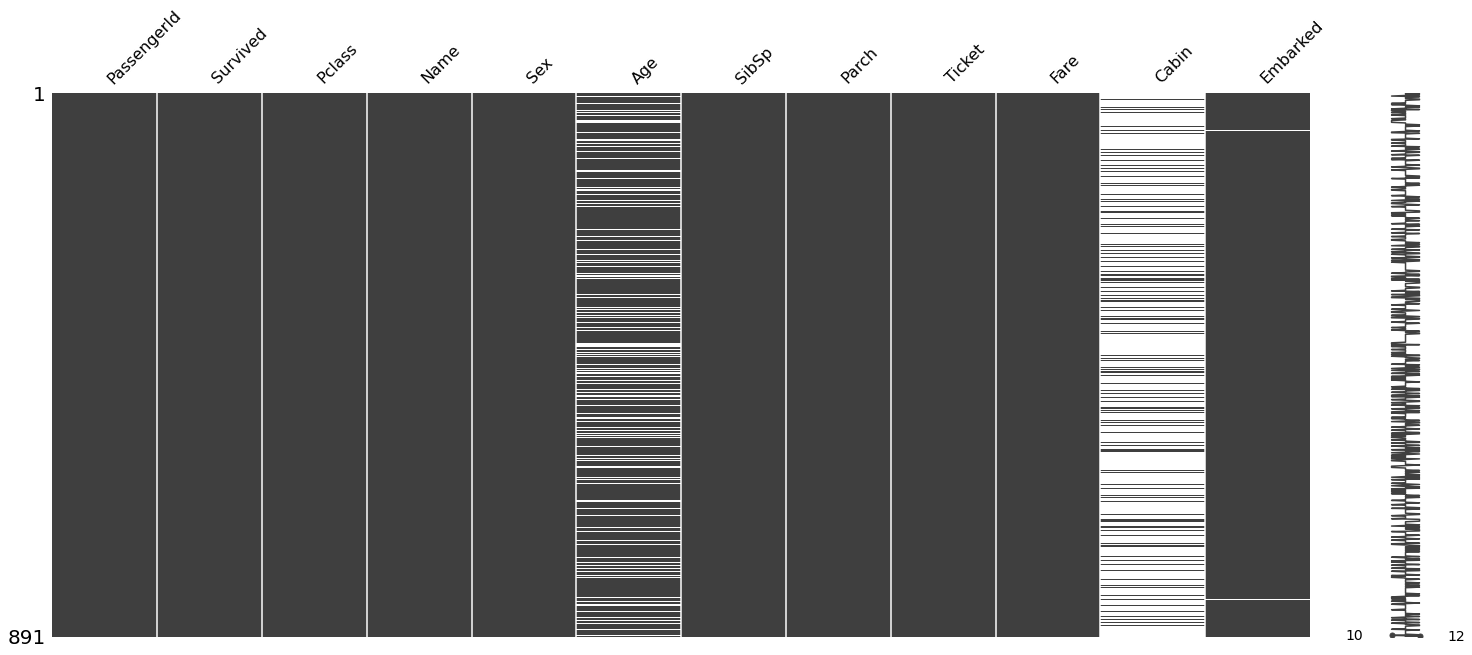

In [39]:
import missingno as msno
msno.matrix(train)

<AxesSubplot:>

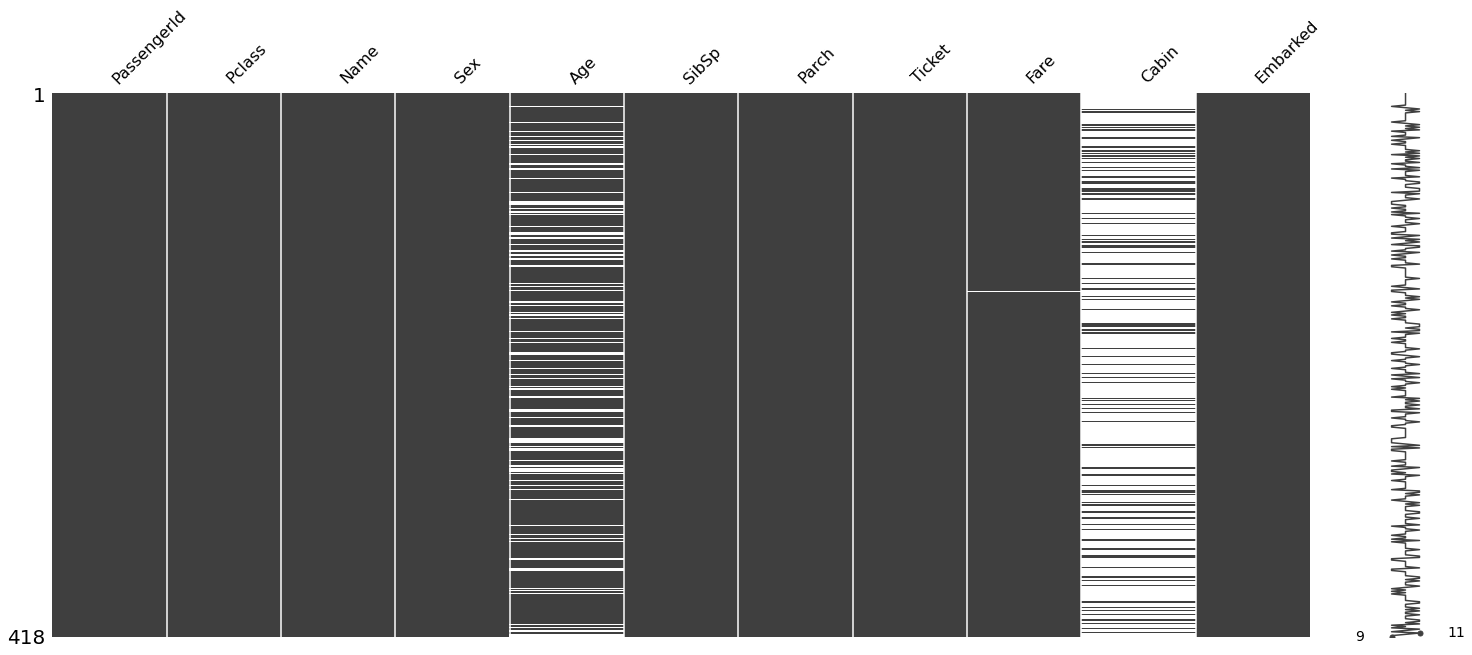

In [40]:
msno.matrix(test)

* Embarked Column has very few missing values, do not seem to be correlated with any other column and can be attributed as MCAR

* Both age and cabin column has lots of missing values. This could be case of MAR as we cannot directly observe the reason for missingness of data in these columns

<AxesSubplot:>

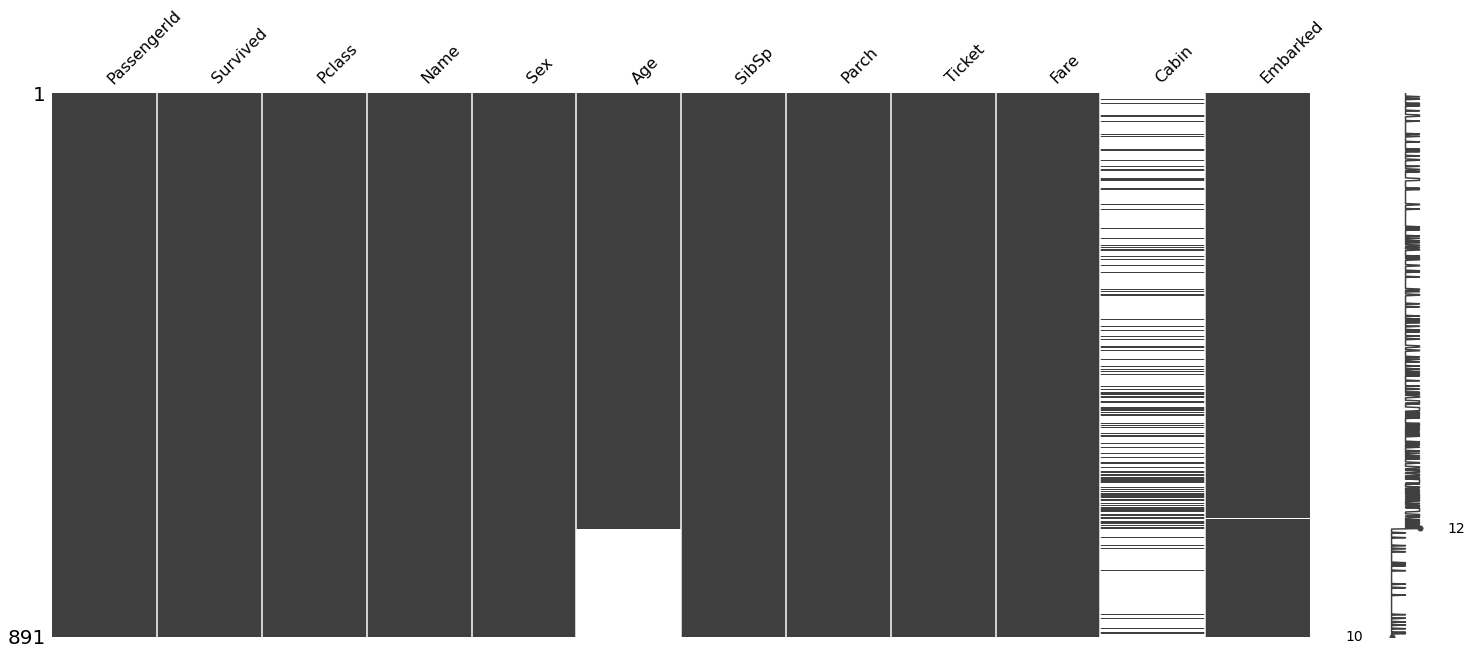

In [41]:
#sort column by Age to see any relation between missing values

sorted=train.sort_values('Age')
msno.matrix(sorted)

* We can see there is no relation between the missing values of both columns

#### Finding reason for missing data using heatmap